In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data = pd.read_csv('/Market_Basket_Analysis_1.csv', header = None)
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


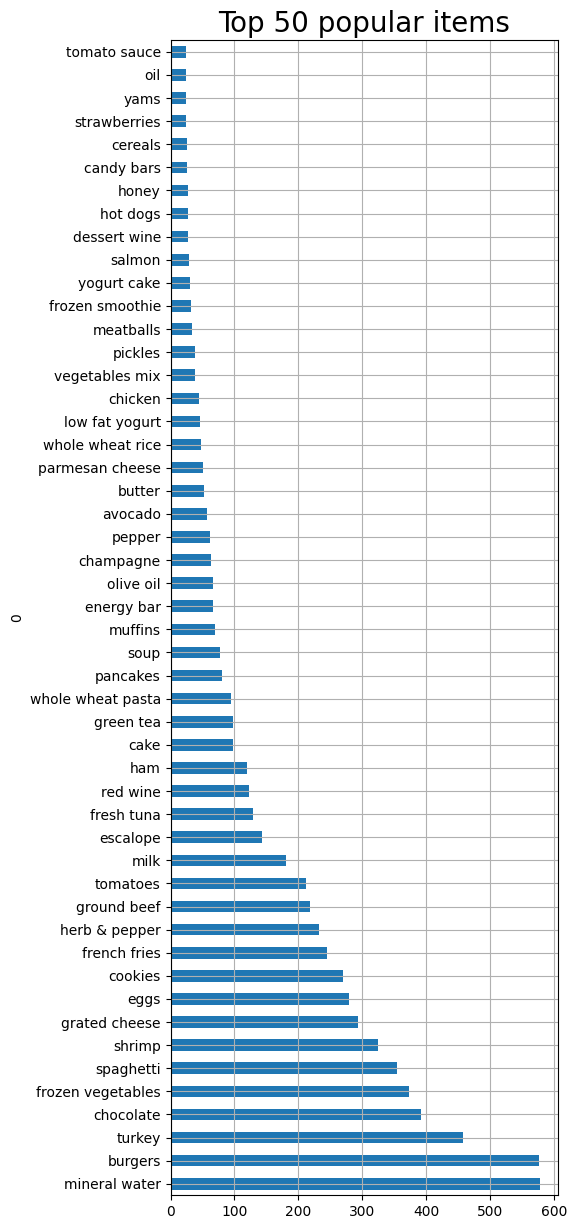

In [ ]:
data[0].value_counts().head(50).plot.barh(figsize=(5,15))
plt.title('Top 50 popular items', fontsize = 20)
plt.grid()
plt.show()

In [ ]:
transactions = []
for i in range(0, len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0, len(data.columns))])
print(transactions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['chutney', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['turkey', 'avocado', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['low fat yogurt', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan

In [ ]:
encoder = TransactionEncoder().fit(transactions)
#one-hot encode transactions
data = TransactionEncoder().fit_transform(transactions)
#convert one-hot encoded data to dataframe
data = pd.DataFrame(data, columns = encoder.columns_).drop('nan', axis=1)
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


***APRIORI***

In [ ]:
#itemsets for min_support = 0.01
itemsets = apriori(data, min_support= 0.01, use_colnames=True)
print(itemsets.to_string())

      support                                       itemsets
0    0.020397                                      (almonds)
1    0.033329                                      (avocado)
2    0.010799                               (barbecue sauce)
3    0.014265                                    (black tea)
4    0.011465                                   (body spray)
5    0.033729                                     (brownies)
6    0.087188                                      (burgers)
7    0.030129                                       (butter)
8    0.081056                                         (cake)
9    0.015331                                      (carrots)
10   0.025730                                      (cereals)
11   0.046794                                    (champagne)
12   0.059992                                      (chicken)
13   0.163845                                    (chocolate)
14   0.010532                                        (cider)
15   0.080389           

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#association rules for itemsets with min_support = 0.01 and confidence > 0.3
rules = association_rules(itemsets, metric='confidence', min_threshold=0.3).sort_values('confidence', ascending = False)
cols = ['antecedents', 'consequents','confidence','lift', 'antecedent support', 'consequent support', 'support','leverage', 'conviction', 'zhangs_metric']
rules = rules[cols]
print(rules.to_string())

                           antecedents      consequents  confidence      lift  antecedent support  consequent support   support  leverage  conviction  zhangs_metric
45                 (eggs, ground beef)  (mineral water)    0.506667  2.125563            0.019997            0.238368  0.010132  0.005365    1.543848       0.540342
54                 (milk, ground beef)  (mineral water)    0.503030  2.110308            0.021997            0.238368  0.011065  0.005822    1.532552       0.537969
39            (chocolate, ground beef)  (mineral water)    0.473988  1.988472            0.023064            0.238368  0.010932  0.005434    1.447937       0.508837
50           (frozen vegetables, milk)  (mineral water)    0.468927  1.967236            0.023597            0.238368  0.011065  0.005440    1.434136       0.503555
28                              (soup)  (mineral water)    0.456464  1.914955            0.050527            0.238368  0.023064  0.011020    1.401255       0.503221
61        

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


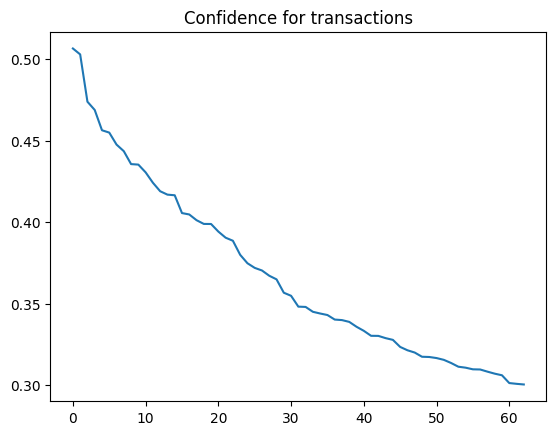

In [ ]:
plt.title('Confidence for transactions')
plt.plot(range(rules.shape[0]), rules['confidence'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


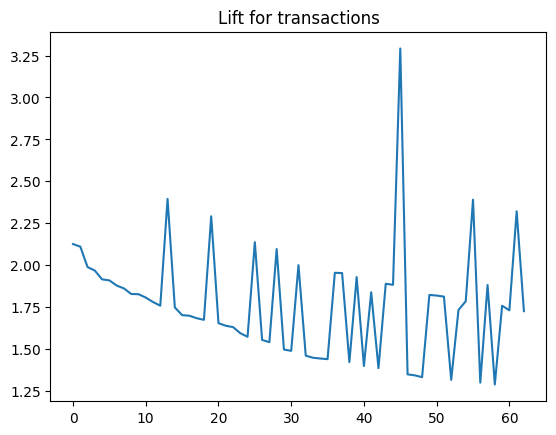

In [ ]:
plt.title('Lift for transactions')
plt.plot(range(rules.shape[0]), rules['lift'])

In [ ]:
#association rules for itemsets with min_support = 0.01 and confidence > 0.3 and lift > 1
print(rules[(rules['lift'] > 1)].to_string())

                           antecedents      consequents  confidence      lift  antecedent support  consequent support   support  leverage  conviction  zhangs_metric
45                 (eggs, ground beef)  (mineral water)    0.506667  2.125563            0.019997            0.238368  0.010132  0.005365    1.543848       0.540342
54                 (milk, ground beef)  (mineral water)    0.503030  2.110308            0.021997            0.238368  0.011065  0.005822    1.532552       0.537969
39            (chocolate, ground beef)  (mineral water)    0.473988  1.988472            0.023064            0.238368  0.010932  0.005434    1.447937       0.508837
50           (frozen vegetables, milk)  (mineral water)    0.468927  1.967236            0.023597            0.238368  0.011065  0.005440    1.434136       0.503555
28                              (soup)  (mineral water)    0.456464  1.914955            0.050527            0.238368  0.023064  0.011020    1.401255       0.503221
61        

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#itemsets for min_support = 0.05
itemsets = apriori(data, min_support= 0.05, use_colnames=True)
print(itemsets.to_string())

     support                    itemsets
0   0.087188                   (burgers)
1   0.081056                      (cake)
2   0.059992                   (chicken)
3   0.163845                 (chocolate)
4   0.080389                   (cookies)
5   0.051060               (cooking oil)
6   0.179709                      (eggs)
7   0.079323                  (escalope)
8   0.170911              (french fries)
9   0.063325           (frozen smoothie)
10  0.095321         (frozen vegetables)
11  0.052393             (grated cheese)
12  0.132116                 (green tea)
13  0.098254               (ground beef)
14  0.076523            (low fat yogurt)
15  0.129583                      (milk)
16  0.238368             (mineral water)
17  0.065858                 (olive oil)
18  0.095054                  (pancakes)
19  0.071457                    (shrimp)
20  0.050527                      (soup)
21  0.174110                 (spaghetti)
22  0.068391                  (tomatoes)
23  0.062525    

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#association rules for itemsets with min_support = 0.05 and confidence > 0.2
rules = association_rules(itemsets, metric='confidence', min_threshold=0.2).sort_values('confidence', ascending = False)
cols = ['antecedents', 'consequents','confidence','lift', 'antecedent support', 'consequent support', 'support','leverage', 'conviction', 'zhangs_metric']
rules = rules[cols]
print(rules.to_string())

       antecedents      consequents  confidence      lift  antecedent support  consequent support   support  leverage  conviction  zhangs_metric
4      (spaghetti)  (mineral water)    0.343032  1.439085            0.174110            0.238368  0.059725  0.018223    1.159314       0.369437
0      (chocolate)  (mineral water)    0.321400  1.348332            0.163845            0.238368  0.052660  0.013604    1.122357       0.308965
2           (eggs)  (mineral water)    0.283383  1.188845            0.179709            0.238368  0.050927  0.008090    1.062815       0.193648
5  (mineral water)      (spaghetti)    0.250559  1.439085            0.238368            0.174110  0.059725  0.018223    1.102008       0.400606
1  (mineral water)      (chocolate)    0.220917  1.348332            0.238368            0.163845  0.052660  0.013604    1.073256       0.339197
3  (mineral water)           (eggs)    0.213647  1.188845            0.238368            0.179709  0.050927  0.008090    1.043158 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#association rules for itemsets with min_support = 0.05 and lift > 1
rules = association_rules(itemsets, metric='lift', min_threshold=1).sort_values('lift', ascending = False)
cols = ['antecedents', 'consequents','confidence','lift', 'antecedent support', 'consequent support', 'support','leverage', 'conviction', 'zhangs_metric']
print(rules[cols].to_string())

       antecedents      consequents  confidence      lift  antecedent support  consequent support   support  leverage  conviction  zhangs_metric
4      (spaghetti)  (mineral water)    0.343032  1.439085            0.174110            0.238368  0.059725  0.018223    1.159314       0.369437
5  (mineral water)      (spaghetti)    0.250559  1.439085            0.238368            0.174110  0.059725  0.018223    1.102008       0.400606
0      (chocolate)  (mineral water)    0.321400  1.348332            0.163845            0.238368  0.052660  0.013604    1.122357       0.308965
1  (mineral water)      (chocolate)    0.220917  1.348332            0.238368            0.163845  0.052660  0.013604    1.073256       0.339197
2           (eggs)  (mineral water)    0.283383  1.188845            0.179709            0.238368  0.050927  0.008090    1.062815       0.193648
3  (mineral water)           (eggs)    0.213647  1.188845            0.238368            0.179709  0.050927  0.008090    1.043158 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


***FP-GROWTH***

In [ ]:
#itemsets for min_support = 0.05
itemsets = fpgrowth(data, min_support=0.05, use_colnames=True)
print(itemsets.to_string())

     support                    itemsets
0   0.238368             (mineral water)
1   0.132116                 (green tea)
2   0.076523            (low fat yogurt)
3   0.071457                    (shrimp)
4   0.065858                 (olive oil)
5   0.063325           (frozen smoothie)
6   0.179709                      (eggs)
7   0.087188                   (burgers)
8   0.062525                    (turkey)
9   0.129583                      (milk)
10  0.058526          (whole wheat rice)
11  0.170911              (french fries)
12  0.050527                      (soup)
13  0.174110                 (spaghetti)
14  0.095321         (frozen vegetables)
15  0.080389                   (cookies)
16  0.051060               (cooking oil)
17  0.163845                 (chocolate)
18  0.059992                   (chicken)
19  0.068391                  (tomatoes)
20  0.095054                  (pancakes)
21  0.052393             (grated cheese)
22  0.098254               (ground beef)
23  0.079323    

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#association rules for itemsets with min_support = 0.05 and confidence > 0.2
rules = association_rules(itemsets, metric='confidence', min_threshold=0.2).sort_values('confidence', ascending = False)
cols = ['antecedents', 'consequents','confidence','lift', 'antecedent support', 'consequent support', 'support','leverage', 'conviction', 'zhangs_metric']
rules = rules[cols]
print(rules.to_string())

       antecedents      consequents  confidence      lift  antecedent support  consequent support   support  leverage  conviction  zhangs_metric
2      (spaghetti)  (mineral water)    0.343032  1.439085            0.174110            0.238368  0.059725  0.018223    1.159314       0.369437
4      (chocolate)  (mineral water)    0.321400  1.348332            0.163845            0.238368  0.052660  0.013604    1.122357       0.308965
0           (eggs)  (mineral water)    0.283383  1.188845            0.179709            0.238368  0.050927  0.008090    1.062815       0.193648
3  (mineral water)      (spaghetti)    0.250559  1.439085            0.238368            0.174110  0.059725  0.018223    1.102008       0.400606
5  (mineral water)      (chocolate)    0.220917  1.348332            0.238368            0.163845  0.052660  0.013604    1.073256       0.339197
1  (mineral water)           (eggs)    0.213647  1.188845            0.238368            0.179709  0.050927  0.008090    1.043158 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#association rules for itemsets with min_support = 0.05 and confidence > 0.2 and lift > 1
print(rules[(rules['lift'] > 1)].to_string())

       antecedents      consequents  confidence      lift  antecedent support  consequent support   support  leverage  conviction  zhangs_metric
2      (spaghetti)  (mineral water)    0.343032  1.439085            0.174110            0.238368  0.059725  0.018223    1.159314       0.369437
4      (chocolate)  (mineral water)    0.321400  1.348332            0.163845            0.238368  0.052660  0.013604    1.122357       0.308965
0           (eggs)  (mineral water)    0.283383  1.188845            0.179709            0.238368  0.050927  0.008090    1.062815       0.193648
3  (mineral water)      (spaghetti)    0.250559  1.439085            0.238368            0.174110  0.059725  0.018223    1.102008       0.400606
5  (mineral water)      (chocolate)    0.220917  1.348332            0.238368            0.163845  0.052660  0.013604    1.073256       0.339197
1  (mineral water)           (eggs)    0.213647  1.188845            0.238368            0.179709  0.050927  0.008090    1.043158 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#itemsets for min_support = 0.01
itemsets = fpgrowth(data, min_support=0.01, use_colnames=True)
itemsets
#print(itemsets.to_string())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
...,...,...
252,0.011465,"(burgers, cake)"
253,0.014131,"(green tea, cake)"
254,0.010265,"(frozen vegetables, cake)"
255,0.011865,"(pancakes, cake)"


In [ ]:
#association rules for itemsets with min_support = 0.01 and confidence > 0.3
rules = association_rules(itemsets, metric='confidence', min_threshold=0.3).sort_values('confidence', ascending = False)
cols = ['antecedents', 'consequents','confidence','lift', 'antecedent support', 'consequent support', 'support','leverage', 'conviction', 'zhangs_metric']
rules = rules[cols]
rules
#print(rules.to_string())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,confidence,lift,antecedent support,consequent support,support,leverage,conviction,zhangs_metric
57,"(eggs, ground beef)",(mineral water),0.506667,2.125563,0.019997,0.238368,0.010132,0.005365,1.543848,0.540342
55,"(milk, ground beef)",(mineral water),0.503030,2.110308,0.021997,0.238368,0.011065,0.005822,1.532552,0.537969
56,"(chocolate, ground beef)",(mineral water),0.473988,1.988472,0.023064,0.238368,0.010932,0.005434,1.447937,0.508837
31,"(frozen vegetables, milk)",(mineral water),0.468927,1.967236,0.023597,0.238368,0.011065,0.005440,1.434136,0.503555
25,(soup),(mineral water),0.456464,1.914955,0.050527,0.238368,0.023064,0.011020,1.401255,0.503221
...,...,...,...,...,...,...,...,...,...,...
13,(turkey),(mineral water),0.307036,1.288075,0.062525,0.238368,0.019197,0.004293,1.099093,0.238564
42,(tomatoes),(spaghetti),0.306043,1.757755,0.068391,0.174110,0.020931,0.009023,1.190117,0.462740
39,"(chocolate, mineral water)",(spaghetti),0.301266,1.730318,0.052660,0.174110,0.015865,0.006696,1.181980,0.445533
24,(soup),(milk),0.300792,2.321232,0.050527,0.129583,0.015198,0.008651,1.244861,0.599484


In [ ]:
#association rules for itemsets with min_support = 0.01 and confidence > 0.3 and lift > 1
rules[(rules['lift'] > 1)]
#print(rules[(rules['lift'] > 1)].to_string())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,confidence,lift,antecedent support,consequent support,support,leverage,conviction,zhangs_metric
57,"(eggs, ground beef)",(mineral water),0.506667,2.125563,0.019997,0.238368,0.010132,0.005365,1.543848,0.540342
55,"(milk, ground beef)",(mineral water),0.503030,2.110308,0.021997,0.238368,0.011065,0.005822,1.532552,0.537969
56,"(chocolate, ground beef)",(mineral water),0.473988,1.988472,0.023064,0.238368,0.010932,0.005434,1.447937,0.508837
31,"(frozen vegetables, milk)",(mineral water),0.468927,1.967236,0.023597,0.238368,0.011065,0.005440,1.434136,0.503555
25,(soup),(mineral water),0.456464,1.914955,0.050527,0.238368,0.023064,0.011020,1.401255,0.503221
...,...,...,...,...,...,...,...,...,...,...
13,(turkey),(mineral water),0.307036,1.288075,0.062525,0.238368,0.019197,0.004293,1.099093,0.238564
42,(tomatoes),(spaghetti),0.306043,1.757755,0.068391,0.174110,0.020931,0.009023,1.190117,0.462740
39,"(chocolate, mineral water)",(spaghetti),0.301266,1.730318,0.052660,0.174110,0.015865,0.006696,1.181980,0.445533
24,(soup),(milk),0.300792,2.321232,0.050527,0.129583,0.015198,0.008651,1.244861,0.599484


In [ ]:
#association rules for itemsets with min_support = 0.01 and confidence > 0.3
#sorted by consequents
print(rules[(rules['lift'] > 1)].sort_values('consequents').to_string())

                           antecedents      consequents  confidence      lift  antecedent support  consequent support   support  leverage  conviction  zhangs_metric
57                 (eggs, ground beef)  (mineral water)    0.506667  2.125563            0.019997            0.238368  0.010132  0.005365    1.543848       0.540342
58                     (herb & pepper)  (mineral water)    0.345013  1.447397            0.049460            0.238368  0.017064  0.005275    1.162821       0.325188
21                  (whole wheat rice)  (mineral water)    0.343964  1.442993            0.058526            0.238368  0.020131  0.006180    1.160960       0.326080
26                         (spaghetti)  (mineral water)    0.343032  1.439085            0.174110            0.238368  0.059725  0.018223    1.159314       0.369437
18                   (milk, chocolate)      (spaghetti)    0.340249  1.954217            0.032129            0.174110  0.010932  0.005338    1.251821       0.504495
47        

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


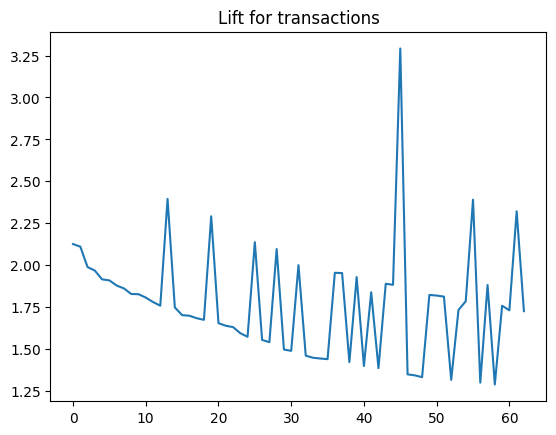

In [ ]:
plt.title('Lift for transactions')
plt.plot(range(rules.shape[0]), rules['lift'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


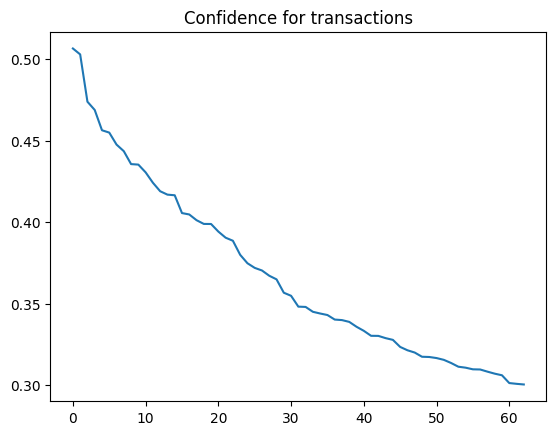

In [ ]:
plt.title('Confidence for transactions')
plt.plot(range(rules.shape[0]), rules['confidence'])